Name: Benjie Gonzales Jr.
<br>
201909128

<b>Naive Bayes Spam Filter</b>
<br>
CMSC 197, Problem Set 2

In [6]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection
import sklearn.datasets

%matplotlib inline

##### For Preprocessing #####
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures, scale

##### For Building the Model #####
#from sklearn.linear_model import LinearRegression, Lasso, Ridge
#from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.model_selection import cross_val_score

##### random module ######
import random

import os


#### email package ####
import email
#from email import parser
from email import message

import string
import re

#### Preprocessing (10 points)

* Split the dataset into three(3) groups: training set for ham, training set for spam, and the testing set.

    Folders 0-70: Train Set

    Folders 71-127: Test set

    Train sets included 21, 300 emails and 16, 522 emails for the test set. The labels contained in the label file was attached to its corresponding email

In [7]:
with open("C:\\cmsc197\\labels") as labels_file:
    labels = labels_file.read().splitlines()
with open("C:\\cmsc197\\stop_words.txt") as stop_file:
    stopwords = stop_file.read().splitlines()

* Remove words from the document which may not contribute to the information we want to extract. These includes dropping the alphanumeric characters and punctuation marks.

*  Remove stop words, more popularly known as meaningless words, from the email body since those words are not useful in classification as well as reduce the dimensionality of the dictionary. A text file with filename, <b>stop_words.txt</b>, is also uploaded in LMS.

In [9]:
def get_email_body(file):
    msg = email.message_from_file(f)
    body = msg.get_payload()
    return body

In [10]:
def clean_data(body):
    if type(body) == str:
        list_words = body.split()
    else:
        new_body = body[0]
        list_words = new_body.as_string().split()
    
    for i in range(len(list_words)):
        list_words[i] = re.sub(r'\W+', '', list_words[i].translate(list_words[i].maketrans('', '', string.punctuation)).lower())
    
    new_list = [word for word in list_words if len(word) != 0]
    return [word for word in new_list if word not in stop_words and word.isalnum()]

In [12]:
def count_ocurrences(word_list):
    global word_count_df
    word_df = pd.value_counts(np.array(word_list))
    word_count_df = pd.concat([word_count_df, word_df])

* <b>Preprocessing Loop</b>

In [21]:
word_count_df = pd.Series(dtype=int)

In [22]:
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        body = get_email_body(f)
        word_list = clean_data(body)
        
        count_ocurrences(word_list)
        
        f.close()

C:\Users\User\MyNew JN Folder\data\000
C:\Users\User\MyNew JN Folder\data\001
C:\Users\User\MyNew JN Folder\data\002
C:\Users\User\MyNew JN Folder\data\003
C:\Users\User\MyNew JN Folder\data\004
C:\Users\User\MyNew JN Folder\data\005
C:\Users\User\MyNew JN Folder\data\006
C:\Users\User\MyNew JN Folder\data\007
C:\Users\User\MyNew JN Folder\data\008
C:\Users\User\MyNew JN Folder\data\009
C:\Users\User\MyNew JN Folder\data\010
C:\Users\User\MyNew JN Folder\data\011
C:\Users\User\MyNew JN Folder\data\012
C:\Users\User\MyNew JN Folder\data\013
C:\Users\User\MyNew JN Folder\data\014
C:\Users\User\MyNew JN Folder\data\015
C:\Users\User\MyNew JN Folder\data\016
C:\Users\User\MyNew JN Folder\data\017
C:\Users\User\MyNew JN Folder\data\018
C:\Users\User\MyNew JN Folder\data\019
C:\Users\User\MyNew JN Folder\data\020
C:\Users\User\MyNew JN Folder\data\021
C:\Users\User\MyNew JN Folder\data\022
C:\Users\User\MyNew JN Folder\data\023
C:\Users\User\MyNew JN Folder\data\024
C:\Users\User\MyNew JN Fo

* Extract a list of unique words from the training set along with its summed number of occurrences from the spam and ham set. To limit the cardinality of the dictionary, we can extract only the 10000 most common words (common means that these words have the highest frequencies/occurences in the dataset).

In [23]:
word_count_df = word_count_df.rename_axis('Word').reset_index(name="Count")
word_count_df = word_count_df.groupby('Word', as_index=False).agg({'Count': 'sum'})

In [24]:
sorted_count = word_count_df.sort_values(by="Count", ascending=False)
sorted_count

,Word,Count
10712,20,14607
40258,bb,14490
137053,td,14268
139676,tr,11699
147426,will,11427
...,...,...
12121,211739,1
12122,211801,1
12123,211839,1
12124,211904,1


In [25]:
common_words_df = sorted_count[['Word', 'Count']][:10000].reset_index(drop=True)
common_words_df

,Word,Count
0,20,14607
1,bb,14490
2,td,14268
3,tr,11699
4,will,11427
...,...,...
9995,eylیzɋâdɋǘvb,24
9996,eɉăb,24
9997,vuitton,24
9998,eɖɘaȃb,24


In [26]:
common_words = list(common_words_df.Word)

In [27]:
common_words

['20',
 'bb',
 'td',
 'tr',
 'will',
 'contenttype',
 'contenttransferencoding',
 'textplain',
 '1',
 'br',
 'board',
 '2',
 'price',
 'company',
 '3',
 'email',
 '7bit',
 'body',
 'list',
 'gold',
 'nil',
 'time',
 'help',
 'message',
 'send',
 'dont',
 'html',
 'subject',
 'charsetiso88591',
 'adobe',
 '1998',
 'crustl',
 'received',
 'program',
 'quotedprintable',
 '10',
 'charsetusascii',
 'table',
 'work',
 'font',
 '5',
 'wrote',
 'well',
 'professional',
 'formatflowed',
 'number',
 'a20',
 'ms',
 'good',
 'university',
 'border0',
 'problem',
 'de',
 '0',
 'stock',
 'file',
 'handyboard',
 'size2',
 '8',
 'hb',
 '15',
 'head',
 'office',
 'info',
 '4',
 '1999',
 '6',
 'windows',
 'microsoft',
 'add',
 'current',
 'studies',
 'code',
 'news',
 'development',
 '7',
 'find',
 'corp',
 'pro',
 'div',
 'china',
 'womens',
 'great',
 'meta',
 'best',
 'read',
 'system',
 'people',
 'today',
 'i20',
 'power',
 'call',
 'save',
 'motor',
 'text',
 'address',
 'fax',
 'unsubscribe',
 'i

#### Creating the feature matrices (5 points)

Create feature matrices for both the spam training set and ham training set with a dimensionality of 10000 (this was the specified number of different words in the dictionary). For each word in the dictionary, traverse through each file and check its occurrence. 1 denotes the existence of a word in the email and 0 otherwise. Thus, a matrix whose rows denote the number of files of
training/testing set and columns denoting 10000 words will be generated. Every email in the training as a feature vector.

In [28]:
total_spam = 0
total_ham = 0
spam_values = []
ham_values = []

In [30]:
folder_count = 0

for folder in training_folders:
    print(folder)
    email_files = os.listdir(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
         
        body = get_email_body(f)
        word_list = clean_data(body)
        word_list_copy = word_list.copy()
        
        if "spam" in labels[i + (folder_count*300)]:
            spam_or_ham = "spam"
            total_spam = total_spam + 1
        else:
            spam_or_ham = "ham"
            total_ham = total_ham + 1
        
        email_values = []
        
        for word in common_words:
            if (word in word_list):
                value = 1
            else:
                value = 0
            
            email_values.append(value)
        
        for word in word_list_copy:
            if word not in common_words:
                word_list.remove(word)
        
        if spam_or_ham == "spam":
            spam_values.append(email_values)   
        else:
            ham_values.append(email_values)
   
        f.close()
    
    folder_count = folder_count + 1

C:\Users\User\MyNew JN Folder\data\000
C:\Users\User\MyNew JN Folder\data\001
C:\Users\User\MyNew JN Folder\data\002
C:\Users\User\MyNew JN Folder\data\003
C:\Users\User\MyNew JN Folder\data\004
C:\Users\User\MyNew JN Folder\data\005
C:\Users\User\MyNew JN Folder\data\006
C:\Users\User\MyNew JN Folder\data\007
C:\Users\User\MyNew JN Folder\data\008
C:\Users\User\MyNew JN Folder\data\009
C:\Users\User\MyNew JN Folder\data\010
C:\Users\User\MyNew JN Folder\data\011
C:\Users\User\MyNew JN Folder\data\012
C:\Users\User\MyNew JN Folder\data\013
C:\Users\User\MyNew JN Folder\data\014
C:\Users\User\MyNew JN Folder\data\015
C:\Users\User\MyNew JN Folder\data\016
C:\Users\User\MyNew JN Folder\data\017
C:\Users\User\MyNew JN Folder\data\018
C:\Users\User\MyNew JN Folder\data\019
C:\Users\User\MyNew JN Folder\data\020
C:\Users\User\MyNew JN Folder\data\021
C:\Users\User\MyNew JN Folder\data\022
C:\Users\User\MyNew JN Folder\data\023
C:\Users\User\MyNew JN Folder\data\024
C:\Users\User\MyNew JN Fo

In [32]:
spam_feature_matrix = pd.DataFrame(spam_values, columns=common_words)
spam_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13774,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
ham_feature_matrix = pd.DataFrame(ham_values, columns=common_words)
ham_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7521,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Computing the Priors (5 points)

The prior probabilities for spam and ham are computed by the following formula:
    
    $P(c=ham)=\frac{N_{ham}}{N_{doc}}$
    
    $P(c=spam)=\frac{N_{spam}}{N_{doc}}$
Where $N_{ham}$ is the number of spam emails in the training set, $N_{spam}$ is the number of spam emails in the training set, and $N_{doc}$ is the total number of emails

In [38]:
total_emails = len(spam_feature_matrix) + len(ham_feature_matrix) #21300
total_emails

21300

In [39]:
prob_spam = total_spam / total_emails
prob_spam

0.6468075117370892

In [40]:
prob_ham = total_ham / total_emails
prob_ham

0.3531924882629108

#### Computing the Likelihood of each word (15 points + 5 points for Laplace smoothing)

* A vector containing the number of occurrences of each word in the dataset will be created.

* One vector will contain the number of occurrences of each word in the ham vocabulary and another vector for the spam vocabulary. 

$P(w_{i}|spam)=frac{count(w_{i}, spam)}{\sum_{wEV} count(w,spam)}$

* There are cases when we encounter a word in a dictionary which is not included in the trainset. In that case the probability of a word occurring given the classification will be 0 which will make the probability of the class given the word also equal to 0. To address the problem, lambda smoothing is introduced where a lambda is added to the numerator and add lambda times the number of words in the vocabulary.

* For computing the likelihoods of each word, with laplace smoothing.

In [41]:
spam_vector = spam_feature_matrix.sum()
spam_vector

20              1529
bb               988
td               866
tr               870
will            2237
                ... 
eylیzɋâdɋǘvb      24
eɉăb              24
vuitton           22
eɖɘaȃb            24
恚bb               12
Length: 10000, dtype: int64

In [44]:
ham_vector = ham_feature_matrix.sum()
ham_vector

20               388
bb                11
td                16
tr                13
will            2304
                ... 
eylیzɋâdɋǘvb       0
eɉăb               0
vuitton            0
eɖɘaȃb             0
恚bb                0
Length: 10000, dtype: int64

In [45]:
prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

In [46]:
prob_spam_words.Word = spam_feature_matrix.columns
prob_ham_words.Word = ham_feature_matrix.columns

In [47]:
spam_word_total = spam_feature_matrix.values.sum()
ham_word_total = ham_feature_matrix.values.sum()

spam_word_total

537167

In [48]:
ham_word_total

377241

In [49]:
lambda_value = 0.005

In [50]:
probabilities = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (spam_word_total + lambda_value * len(spam_vector))
    probabilities.append(probability)

In [51]:
prob_spam_words.Probability = probabilities
prob_spam_words

,Word,Probability
0,20,0.002846
1,bb,0.001839
2,td,0.001612
3,tr,0.001619
4,will,0.004164
...,...,...
9995,eylیzɋâdɋǘvb,0.000045
9996,eɉăb,0.000045
9997,vuitton,0.000041
9998,eɖɘaȃb,0.000045


In [52]:
probabilities = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (ham_word_total + lambda_value * len(ham_vector))
    probabilities.append(probability)

In [53]:
prob_ham_words.Probability = probabilities
prob_ham_words

,Word,Probability
0,20,1.028397e-03
1,bb,2.916847e-05
2,td,4.242084e-05
3,tr,3.446941e-05
4,will,6.106705e-03
...,...,...
9995,eylیzɋâdɋǘvb,1.325237e-08
9996,eɉăb,1.325237e-08
9997,vuitton,1.325237e-08
9998,eɖɘaȃb,1.325237e-08


In [54]:
scount = 0
hcount = 0
for label in labels[:21300]:
    if "spam" in label:
        scount = scount + 1
    else:
        hcount = hcount + 1
print(scount)
print(hcount)

13777
7523


In [55]:
prob_spam_words.Probability.sum()

1.0

In [64]:
prob_spam_words_copy = prob_spam_words.copy()
prob_spam_words_copy = prob_spam_words_copy.set_index('Word').to_dict('index')

In [65]:
prob_ham_words_copy = prob_ham_words.copy()
prob_ham_words_copy = prob_ham_words_copy.set_index('Word').to_dict('index')

#### Classifying the emails (10 points + 10 points for computing the log probabilities)

* Based on the probabilities of words given the label computed, determine the probability of ham and the probability of spam given the document. Whichever has a higher value will be the classification of the email. Baye’s rule was applied to the computed likelihoods. 

* If $𝑃(𝑆 | 𝑤_{𝑑}) > 𝑃(𝐻 | 𝑤_{𝑑})$, it is classified as spam and ham otherwise. Since the denominators of the formula to solve $𝑃(𝑆 | 𝑥_{𝑑})$ 𝑎𝑛𝑑 $𝑃(𝐻 | 𝑥_{𝑑})$ are similar, we can omit it from our computation. This further simplifies the equation.

    $log(P(c|w_{d}))=\sum_{i=1}^{d} log(w_{i}|c) + log(P(c))$

In [66]:
# will accept email MIME files
def classify_email(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in common_words:
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        #word_prob_spam = prob_spam_words[prob_spam_words['Word'] == word]['Probability'].item() #prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()
        #word_prob_ham = prob_ham_words[prob_ham_words['Word'] == word]['Probability'].item()
        
        word_prob_spam = prob_spam_words_copy[word]['Probability']
        word_prob_ham = prob_ham_words_copy[word]['Probability']
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding
    else:
        #print("skipped")
        return "Spam"
    


#### Testing the Classifier (10 points)

After you’re done with the Naïve Bayes Classifier, implement code for classifying an unknown message and try it on the test set.

In [72]:
test_classification = []
for folder in testing_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # take note of classification labels
        test_classification.append(classify_email(f))
        
        f.close()

C:\Users\User\MyNew JN Folder\data\071
C:\Users\User\MyNew JN Folder\data\072
C:\Users\User\MyNew JN Folder\data\073
C:\Users\User\MyNew JN Folder\data\074
C:\Users\User\MyNew JN Folder\data\075
C:\Users\User\MyNew JN Folder\data\076
C:\Users\User\MyNew JN Folder\data\077
C:\Users\User\MyNew JN Folder\data\078
C:\Users\User\MyNew JN Folder\data\079
C:\Users\User\MyNew JN Folder\data\080
C:\Users\User\MyNew JN Folder\data\081
C:\Users\User\MyNew JN Folder\data\082
C:\Users\User\MyNew JN Folder\data\083
C:\Users\User\MyNew JN Folder\data\084
C:\Users\User\MyNew JN Folder\data\085
C:\Users\User\MyNew JN Folder\data\086
C:\Users\User\MyNew JN Folder\data\087
C:\Users\User\MyNew JN Folder\data\088
C:\Users\User\MyNew JN Folder\data\089
C:\Users\User\MyNew JN Folder\data\090
C:\Users\User\MyNew JN Folder\data\091
C:\Users\User\MyNew JN Folder\data\092
C:\Users\User\MyNew JN Folder\data\093
C:\Users\User\MyNew JN Folder\data\094
C:\Users\User\MyNew JN Folder\data\095
C:\Users\User\MyNew JN Fo

#### Performance Evaluation (10 points)

In order to test the performance of above mentioned six methods, filter the accuracy namely percentage of messages classified correctly.

Where accuracy, recall, precision, FP, FN, TP, and TN are defined as follows:
    <br>
    <br>
   * Accuracy – percentage of correctly identified spam and ham emails
    <br>
   * Recall – percentage of spam emails that are correctly classified as spam
    <br>
   * Precision – number of relevant documents identified as a percentage of all documents identified. This shows the noise that the classifier presents to the user(i.e. how many of spam emails will actually be classified as spam).
    <br>
   * False Positive Rate(FP) – number of misclassified ham emails
    <br>
   * False Negative Rate(FN) – number of misclassified spam emails
    <br>
   * True Positive Rate(TP) – correctly classified spam emails
    <br>
   * True Negative Rate(TN) = correctly classified ham email

In [147]:
test_labels_real = labels[total_emails:]
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
test_classification_2 = test_classification[1301:]
len(test_labels_real)

16522

In [148]:
for i in range(len(test_classification_2)):
    if "spam" in test_labels_real[i] and test_classification[i] == "Spam":
        true_positive = true_positive + 1
    elif "spam" in test_labels_real[i] and test_classification[i] == "Ham":
        false_negative = false_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Ham":
        true_negative = true_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Spam":
        false_positive = false_positive + 1

In [149]:
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)

7905
1980
3407
3230


In [150]:
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + true_negative)
recall = true_positive / (true_positive + false_positive)

In [151]:
accuracy

0.5982931848444498

In [152]:
precision

0.7996965098634294

In [153]:
recall

0.6988154172560113

#### Guide Questions

1. What is the effect of removing stop words in terms of precision, recall, and accuracy? Show a plot or a table of these results.

A Naive Bayes spam classifier's precision, recall, and accuracy may all be improved by eliminating stop words.

Stop words are frequently used terms that are often removed from texts before natural language processing. Stop words, such as "a," "an," "the," and "in," are frequently eliminated from texts since they lack much sense on their own and can add a lot of unnecessary terms to the text, which can harm a machine learning model's performance.

By reducing the amount of extraneous material in the text and allowing the model to focus on the key phrases that are indicative of spam, removing stop words can improve the model's accuracy. By lowering the amount of false negatives—that is, spam messages that are mistakenly labeled as non-spam—this can also improve the model's recall. Overall, by increasing its precision and recall, the removal of stop words can result in a spam classifier that is more accurate.

Stop words don't always mean nothing, either; in some contexts, they might really provide important information. Therefore, stopping words is simply one preprocessing strategy; it is wise to experiment with others and compare the outcomes.


2. Experiment on the number of words used for training. Filter the dictionary to include only words occurring more than k times (1000 words, then k > 100, and k = 50 times). For example, the word “offer” appears 150 times, that means that it will be included in the dictionary.

In [98]:
common_words = common_words_df[common_words_df.Count == 50]
common_words

,Word,Count
5564,alinkffff00,50
5565,measures,50
5566,dual,50
5567,width6,50
5568,dƀ邾,50
...,...,...
5737,bev5ho9s5mmn46nokhj99pfng11d5lfj9ngb,50
5738,bddb,50
5739,b6bo0lzjsb,50
5740,b5pfolhkl9ls3x8mjnmm9jb,50


In [111]:
g2_spam_values = []
g2_ham_values = []

In [112]:
g2_total_spam = 0
g2_total_ham = 0

In [113]:
# iterate through all emails
g2_folder_count = 0
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='ignore')
        
        # getting email body 
        body = get_email_body(f)
        
        # check if email is ham or spam
        if "spam" in labels[i + (g2_folder_count*300)]:
            spam_or_ham = "spam"
            g2_total_spam = g2_total_spam + 1
        else:
            spam_or_ham = "ham"
            g2_total_ham = g2_total_ham + 1
        
        # an in-loop list that will hold the 0 and 1 values of current email
        email_values = []
        
        # loop through top 10000 common words
        for word in common_words['Word']:
            # check if word is in the email body
            if word in body:
                value = 1
            else:
                value = 0
            
            # add value to the list of values
            email_values.append(value)
        
        # combine the current email values to its respective category
        if spam_or_ham == "spam":
            g2_spam_values.append(email_values)
            #spam_feature_matrix = pd.concat([spam_feature_matrix, email_values], ignore_index = True)
        else:
            g2_ham_values.append(email_values)
            #ham_feature_matrix = pd.concat([ham_feature_matrix, email_values], ignore_index = True)
            
        f.close()
    g2_folder_count = g2_folder_count + 1

C:\Users\User\MyNew JN Folder\data\000
C:\Users\User\MyNew JN Folder\data\001
C:\Users\User\MyNew JN Folder\data\002
C:\Users\User\MyNew JN Folder\data\003
C:\Users\User\MyNew JN Folder\data\004
C:\Users\User\MyNew JN Folder\data\005
C:\Users\User\MyNew JN Folder\data\006
C:\Users\User\MyNew JN Folder\data\007
C:\Users\User\MyNew JN Folder\data\008
C:\Users\User\MyNew JN Folder\data\009
C:\Users\User\MyNew JN Folder\data\010
C:\Users\User\MyNew JN Folder\data\011
C:\Users\User\MyNew JN Folder\data\012
C:\Users\User\MyNew JN Folder\data\013
C:\Users\User\MyNew JN Folder\data\014
C:\Users\User\MyNew JN Folder\data\015
C:\Users\User\MyNew JN Folder\data\016
C:\Users\User\MyNew JN Folder\data\017
C:\Users\User\MyNew JN Folder\data\018
C:\Users\User\MyNew JN Folder\data\019
C:\Users\User\MyNew JN Folder\data\020
C:\Users\User\MyNew JN Folder\data\021
C:\Users\User\MyNew JN Folder\data\022
C:\Users\User\MyNew JN Folder\data\023
C:\Users\User\MyNew JN Folder\data\024
C:\Users\User\MyNew JN Fo

In [119]:
g2_spam_feature_matrix = pd.DataFrame(g2_spam_values, columns=common_words['Word'])
g2_ham_feature_matrix = pd.DataFrame(g2_ham_values, columns=common_words['Word'])

In [120]:
g2_spam_vector = g2_spam_feature_matrix.sum()
g2_ham_vector = g2_ham_feature_matrix.sum()

In [121]:
g2_spam_feature_matrix = pd.DataFrame(g2_spam_values, columns=common_words['Word'])
g2_ham_feature_matrix = pd.DataFrame(g2_ham_values, columns=common_words['Word'])

In [122]:
g2_prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_spam_words.Word = g2_spam_feature_matrix.columns
g2_prob_ham_words.Word = g2_ham_feature_matrix.columns
g2_spam_word_total = g2_spam_feature_matrix.values.sum()
g2_ham_word_total = g2_ham_feature_matrix.values.sum()

In [123]:
probabilities = []
for i in range(len(g2_spam_vector)):
    probability = (g2_spam_vector[i] + 1) / (g2_spam_word_total + len(g2_spam_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_spam_words.Probability = probabilities

In [124]:
probabilities = []
for i in range(len(g2_ham_vector)):
    probability = (g2_ham_vector[i] + 1) / (g2_ham_word_total + len(g2_ham_vector))
    probabilities.append(probability)
    #print(top_10000_words['Word'][i], probability)
g2_prob_ham_words.Probability = probabilities

In [125]:
g2_prob_spam_words_copy = g2_prob_spam_words.copy()
g2_prob_spam_words_copy = g2_prob_spam_words_copy.set_index('Word').to_dict('index')

In [126]:
g2_prob_ham_words_copy = g2_prob_ham_words.copy()
g2_prob_ham_words_copy = g2_prob_ham_words_copy.set_index('Word').to_dict('index')

In [127]:
# will accept email MIME files
def classify_email1(file):
    # getting email body 
    body = get_email_body(file)
    
    # cleaning email content
    word_list = clean_data(body)
    word_list = remove_stop_words(word_list)
    
    # make words into lowercase
    word_list = [x.lower() for x in word_list]
    
    final_words = []
    # check which words are found in our word dictionary and only use those
    for word in word_list:
        if word in list(common_words['Word']):
            final_words.append(word)
    
    # calculate if email is spam or ham 
    # summation of log(c) + log(w|c) for all words
    classify_spam = 0
    classify_ham = 0
    for word in final_words:
        # get p(w|S) and p(w|H)
        word_prob_spam = g2_prob_spam_words_copy[word]['Probability']
        word_prob_ham = g2_prob_ham_words_copy[word]['Probability']
        
        classify_spam = classify_spam + (np.log(prob_spam) + np.log(word_prob_spam))
        classify_ham = classify_ham + (np.log(prob_ham) + np.log(word_prob_ham))
        
    if classify_spam > classify_ham:
        #print("Spam")
        return "Spam"
    elif classify_spam < classify_ham:
        #print("Ham")
        return "Ham"
    # there are emails that cannot be opened because of their encoding, so assume they are spam
    else:
        #print("skipped")
        return "Spam"
    
    #print("Spam:", classify_spam)
    #print("Ham:", classify_ham)
    
    
        #word_in_spam = prob_spam_words.loc[df['Word'] == word]
        #print((prob_spam_words.loc[prob_spam_words['Word'] == word, 'Probability'].item()))

In [128]:
g2_test_classification = []
for folder in testing_folders[:10]:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        #print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        g2_test_classification.append(classify_email1(body))
        
        f.close()

C:\Users\User\MyNew JN Folder\data\071
C:\Users\User\MyNew JN Folder\data\072
C:\Users\User\MyNew JN Folder\data\073
C:\Users\User\MyNew JN Folder\data\074
C:\Users\User\MyNew JN Folder\data\075
C:\Users\User\MyNew JN Folder\data\076
C:\Users\User\MyNew JN Folder\data\077
C:\Users\User\MyNew JN Folder\data\078
C:\Users\User\MyNew JN Folder\data\079
C:\Users\User\MyNew JN Folder\data\080


In [129]:
g2_test_labels_real = labels[total_emails:]
g2_true_positive = 0
g2_true_negative = 0
g2_false_positive = 0
g2_false_negative = 0

In [130]:
for i in range(len(g2_test_classification)):
    #print(test_labels_real)
    if "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_true_positive = g2_true_positive + 1
    elif "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_false_negative = g2_false_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_true_negative = g2_true_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_false_positive = g2_false_positive + 1

In [131]:
print(g2_true_positive)
print(g2_true_negative) 
print(g2_false_positive)
print(g2_false_negative)

1973
124
891
12


In [132]:
g2_accuracy = (g2_true_negative + g2_true_positive) / (g2_true_negative + g2_true_positive + g2_false_positive + g2_false_negative)
g2_precision = g2_true_positive / (g2_true_positive + g2_true_negative)
g2_recall = g2_true_positive / (g2_true_positive + g2_false_positive)

In [133]:
print(g2_accuracy, g2_precision, g2_recall)

0.699 0.9408679065331426 0.6888966480446927


In [134]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [g2_accuracy, g2_precision, g2_recall]

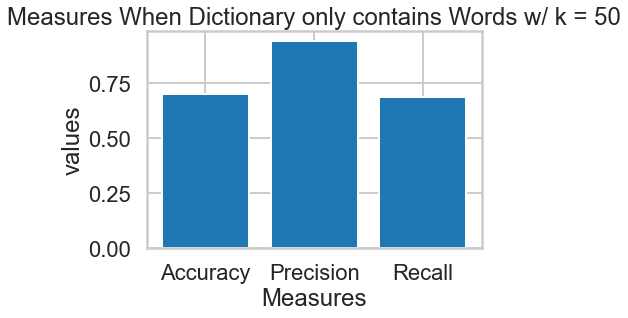

In [135]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Dictionary only contains Words w/ k = 50')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()


3. Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics for each.

An approach called lambda (λ) smoothing, which is based on Bayes' theorem, is used to avoid zero probability in a Naive Bayes classifier. It aids in minimizing the effects of uncommon occurrences and smoothing the calculation of probabilities, which can enhance the effectiveness of the classifier.

You can discover the best value for your particular dataset by running the model on a range of values of λ to get a sense of how sensitive the model is to changes in the smoothing parameter.

For instance, you might analyze the performance measures (such accuracy, precision, recall, and F1-score) for each of the five distinct values of λ  (e.g., = 2.0, 1.0, 0.5, 0.1, and 0.005) by running the model on each one.

When  λ is large, like 2.0, the influence of smoothing is higher and it will give even occurrences that haven't been observed in the training dataset a non-zero probability. When λ is low, such as 0.005, however, smoothing has less of an effect and will give occurrences that haven't been observed in the training dataset a probability that is closer to zero.

In general, increasing λ will reduce the model's variance but may also increase bias, whereas decreasing λ may result in an increase in variance but a decrease in bias. You may select the λ value that balances bias and variance and offers the best overall performance based on the performance indicators.

The ideal value of λ must be tested in order to determine which is appropriate for your particular situation since the optimal value of λ depends on the individual characteristics of your data.


4. What are your recommendations to further improve the model?

A Naive Bayes spam classifier may be further enhanced in the following ways, in my opinion:

Use additional training data - A model's ability to generalize to new examples can be improved with a bigger and more varied training dataset.

Tuning hyperparameters - Improve the model's performance by changing the algorithm's parameters, such as the Laplace smoothing (alpha). To get the ideal values for these characteristics, use methods like grid search or random search.

Feature engineering - Utilize additional features to represent the data, such as stemming or N-grams. This might give the model access to additional data, which would improve its ability to categorize spam.


Using Advanced techniques - Utilize cutting-edge methods like deep learning, which have shown to be highly successful in text categorization jobs.

Ensemble method - Use an ensemble of several classifiers rather than a single one, and let the classifiers decide what the final classification should be. In the majority of circumstances, ensemble approaches have been found to enhance the performance of ML models.

Evaluating with different metrics - Use other assessment measures in addition to precision, recall, and accuracy since the model's effectiveness might fluctuate based on the particular use case.
